In [1]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.initializers import glorot_uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
data = nc.Dataset('Vwind.nc')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121013
    title: monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 11-Dec-2023 06:47:32 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 vwnd(time, lat, lon)
    groups: 

In [4]:
air = data.variables['vwnd']
print(air)

<class 'netCDF4._netCDF4.Variable'>
float32 vwnd(time, lat, lon)
    long_name: Monthly Mean V wind at 10 m
    units: m/s
    CDI_grid_type: gaussian
    CDI_grid_num_LPE: 47
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    GRIB_id: 11
    var_desc: v-wind
    level_desc: 10 m
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-13.041287  14.949664]
unlimited dimensions: time
current shape = (708, 94, 192)
filling off


In [49]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88.542 -88.542]
unlimited dimensions: 
current shape = (94,)
filling off


In [21]:
lat = latitude[:]
lat

masked_array(data=[ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,
                    80.9473  ,  79.0435  ,  77.1394  ,  75.2351  ,
                    73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
                    65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,
                    58.0939  ,  56.1893  ,  54.2846  ,  52.3799  ,
                    50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
                    42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,
                    35.2375  ,  33.3328  ,  31.4281  ,  29.5234  ,
                    27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
                    19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,
                    12.3808  ,  10.47604 ,   8.57131 ,   6.66657 ,
                     4.76184 ,   2.8571  ,   0.952368,  -0.952368,
                    -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 ,
                   -10.47604 , -12.3808  , -14.2855  , -16.1902  ,
                   -18.095   , -19.9997  , -21.9044  , -23.809

In [8]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.    358.125]
unlimited dimensions: 
current shape = (192,)
filling off


In [9]:
lon = longitude[:]
lat.shape

(94,)

In [10]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['vwnd'][start_index:, :, :]

In [11]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [12]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [13]:
data_

array([[[-1.4929032 , -1.430321  , -1.3654824 , ..., -1.6870934 ,
         -1.62032   , -1.5587075 ],
        [-1.5558048 , -1.512902  , -1.4638692 , ..., -1.6525791 ,
         -1.623547  , -1.5906432 ],
        [-2.166773  , -2.1119325 , -2.032579  , ..., -2.266128  ,
         -2.2525797 , -2.223869  ],
        ...,
        [-2.8790312 , -2.9438698 , -2.9948366 , ..., -2.6635466 ,
         -2.7425802 , -2.8193536 ],
        [-2.3087094 , -2.3729007 , -2.433223  , ..., -2.0841925 ,
         -2.1648378 , -2.2345147 ],
        [-1.6467713 , -1.6641924 , -1.6809658 , ..., -1.5806437 ,
         -1.608708  , -1.6322563 ]],

       [[-0.8264269 , -0.80321175, -0.7767852 , ..., -0.91606957,
         -0.88321143, -0.84821373],
        [-0.7364268 , -0.74857   , -0.7660691 , ..., -0.677857  ,
         -0.686427  , -0.7092852 ],
        [-0.99285614, -1.036069  , -1.0657136 , ..., -0.81892616,
         -0.887855  , -0.9464264 ],
        ...,
        [-2.199641  , -2.1664271 , -2.1453557 , ..., -

In [14]:
np.max(data_)

14.949664

In [15]:
np.min(data_)

-13.041287

In [16]:
data_.shape

(708, 94, 192)

In [17]:
len(data_)

708

In [18]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [19]:
num_years

59

In [20]:
num_months

12

In [50]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, data_.shape[1],data_.shape[2]))

In [80]:
data_reshaped.shape

(59, 12, 94, 192)

In [98]:
import numpy as np

lat_indices = []
for start_value in np.arange(90, -90, -10):  # Changed step to -10 for descending order
    end_value = start_value - 10  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((latitude <= start_value) & (latitude > end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmax(latitude[range_indices])]
        max_index = range_indices[np.argmin(latitude[range_indices])]
        
        lat_indices.append(min_index)
        lat_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {latitude[min_index]}, Max = {latitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")


Range 90 to 80: Min index = 0, Max index = 4, Min = 88.54199981689453, Max = 80.94730377197266
Range 80 to 70: Min index = 5, Max index = 9, Min = 79.04350280761719, Max = 71.42620086669922
Range 70 to 60: Min index = 10, Max index = 14, Min = 69.52169799804688, Max = 61.90330123901367
Range 60 to 50: Min index = 15, Max index = 20, Min = 59.998600006103516, Max = 50.47520065307617
Range 50 to 40: Min index = 21, Max index = 25, Min = 48.570499420166016, Max = 40.951698303222656
Range 40 to 30: Min index = 26, Max index = 30, Min = 39.047000885009766, Max = 31.4281005859375
Range 30 to 20: Min index = 31, Max index = 35, Min = 29.523399353027344, Max = 21.904399871826172
Range 20 to 10: Min index = 36, Max index = 41, Min = 19.99970054626465, Max = 10.47603988647461
Range 10 to 0: Min index = 42, Max index = 46, Min = 8.571310043334961, Max = 0.9523680210113525
Range 0 to -10: Min index = 47, Max index = 51, Min = -0.9523680210113525, Max = -8.571310043334961
Range -10 to -20: Min inde

In [99]:
len(lat_indices)

36

In [100]:
lat_indices

[0,
 4,
 5,
 9,
 10,
 14,
 15,
 20,
 21,
 25,
 26,
 30,
 31,
 35,
 36,
 41,
 42,
 46,
 47,
 51,
 52,
 57,
 58,
 62,
 63,
 67,
 68,
 72,
 73,
 78,
 79,
 83,
 84,
 88,
 89,
 93]

In [101]:
import numpy as np

lon_indices = []
for start_value in np.arange(0, 360, 20):  # Changed step to -10 for descending order
    end_value = start_value + 20  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((longitude >= start_value) & (longitude < end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmin(longitude[range_indices])]
        max_index = range_indices[np.argmax(longitude[range_indices])]
        
        lon_indices.append(min_index)
        lon_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {longitude[min_index]}, Max = {longitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")


Range 0 to 20: Min index = 0, Max index = 10, Min = 0.0, Max = 18.75
Range 20 to 40: Min index = 11, Max index = 21, Min = 20.625, Max = 39.375
Range 40 to 60: Min index = 22, Max index = 31, Min = 41.25, Max = 58.125
Range 60 to 80: Min index = 32, Max index = 42, Min = 60.0, Max = 78.75
Range 80 to 100: Min index = 43, Max index = 53, Min = 80.625, Max = 99.375
Range 100 to 120: Min index = 54, Max index = 63, Min = 101.25, Max = 118.125
Range 120 to 140: Min index = 64, Max index = 74, Min = 120.0, Max = 138.75
Range 140 to 160: Min index = 75, Max index = 85, Min = 140.625, Max = 159.375
Range 160 to 180: Min index = 86, Max index = 95, Min = 161.25, Max = 178.125
Range 180 to 200: Min index = 96, Max index = 106, Min = 180.0, Max = 198.75
Range 200 to 220: Min index = 107, Max index = 117, Min = 200.625, Max = 219.375
Range 220 to 240: Min index = 118, Max index = 127, Min = 221.25, Max = 238.125
Range 240 to 260: Min index = 128, Max index = 138, Min = 240.0, Max = 258.75
Range 2

In [106]:
lon_indices

[0,
 10,
 11,
 21,
 22,
 31,
 32,
 42,
 43,
 53,
 54,
 63,
 64,
 74,
 75,
 85,
 86,
 95,
 96,
 106,
 107,
 117,
 118,
 127,
 128,
 138,
 139,
 149,
 150,
 159,
 160,
 170,
 171,
 181,
 182,
 191]

In [107]:
lat_indices[10]

26

In [109]:
for lat_idx in range(0, len(lat_indices), 2):
    lat_range_start = lat_indices[lat_idx]
    lat_range_end = lat_indices[lat_idx + 1]
    print(lat_range_start,lat_range_end)

0 4
5 9
10 14
15 20
21 25
26 30
31 35
36 41
42 46
47 51
52 57
58 62
63 67
68 72
73 78
79 83
84 88
89 93


In [108]:
for lon_idx in range(0, len(lon_indices),2):
    lon_range_start = lon_indices[lon_idx]
    lon_range_end = lon_indices[lon_idx + 1]
    print(lon_range_start,lon_range_end)

0 10
11 21
22 31
32 42
43 53
54 63
64 74
75 85
86 95
96 106
107 117
118 127
128 138
139 149
150 159
160 170
171 181
182 191


In [104]:
def coarse_grading(data, lat_indices, lon_indices):
    coarsed_data = np.zeros((data.shape[0], data.shape[1], len(lat_indices) // 2, len(lon_indices) // 2))
    for lat_idx in range(0, len(lat_indices), 2):
        lat_range_start = lat_indices[lat_idx]
        lat_range_end = lat_indices[lat_idx + 1]
        for lon_idx in range(0, len(lon_indices), 2):
            lon_range_start = lon_indices[lon_idx]
            lon_range_end = lon_indices[lon_idx + 1]
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]
            averaged_value = np.mean(subset, axis=(2, 3))
            coarsed_data[:, :, lat_idx // 2, lon_idx // 2] = averaged_value
    return coarsed_data


In [130]:
avg = coarse_grading(data_reshaped,lat_indices,lon_indices)
avg.shape

(59, 12, 18, 18)

In [131]:
avg

array([[[[-1.41114366e+00, -1.68530598e-01,  7.85467625e-01, ...,
          -7.66950190e-01, -1.28774858e+00, -2.24370813e+00],
         [-1.27141774e+00,  5.50477386e-01,  2.31233120e+00, ...,
           3.87612987e+00, -2.96084523e+00, -5.02377939e+00],
         [ 3.49386454e+00,  1.52217102e+00,  2.58328104e+00, ...,
          -4.97926235e-01, -5.90325642e+00, -1.38129747e+00],
         ...,
         [ 1.02517530e-01, -3.78692031e-01, -5.84845960e-01, ...,
          -2.94538856e-01,  1.36533225e+00,  2.63137221e+00],
         [-6.24264896e-01,  2.10719153e-01,  8.32904696e-01, ...,
           1.74372271e-01,  1.06152558e+00, -2.59730011e-01],
         [-2.81368399e+00, -2.64212751e+00, -1.25040197e+00, ...,
           1.80009410e-01, -5.42740524e-01, -2.33223867e+00]],

        [[-8.58078837e-01, -7.89837718e-01, -6.28391445e-01, ...,
          -2.28025436e-01, -2.18825396e-02, -9.17171240e-01],
         [-1.41534674e+00, -7.24310875e-01,  5.85775197e-01, ...,
           4.82673359e

In [132]:
avg[1,1,:,1]

array([-1.37579322, -0.37761432,  0.98259962, -0.7188341 , -2.39035559,
       -3.6570785 , -2.55940938, -3.06712699,  0.72156376, -0.13419506,
       -0.67897719,  0.2955018 ,  0.73510867, -1.17009699, -3.58016276,
       -1.2948916 ,  2.14891195, -3.18188238])

In [133]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [134]:
final.shape

(59, 12, 324)

In [135]:
np.max(final)

10.61324691772461

In [136]:
np.min(final)

-9.84632396697998

In [137]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [124]:
import numpy as np

def calculate_anomalies_and_normalized_minmax(data):
    """
    Calculates anomalies and min-max normalized data from a given array.

    Args:
        data: A 3D NumPy array with dimensions (time, latitude, longitude).

    Returns:
        A tuple containing two 3D NumPy arrays:
        - anomalies: Normalized anomalies calculated from the data.
        - normalized_data: Min-max normalized data.
    """

    anomalies = np.zeros_like(data)
    normalized_data = np.zeros_like(data)

    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]

            mean = np.mean(month)
            std = np.std(month)
            

            # Normalize each month value
            normalized_month = (month - mean) / std

            # Calculate anomalies from normalized values
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
            # Store normalized month data
            normalized_data[:, j, i] = normalized_month

    return anomalies, normalized_data


In [138]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    normalized_data = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]

            mean = np.mean(month)
            std = np.std(month)
            

            # Normalize each month value
            normalized_month = (month - mean) / std
            
            # Store normalized month data
            normalized_data[:, j, i] = normalized_month


    return normalized_data




In [139]:
anomalies = calculate_monthly_anomaliess(final)
anomalies

array([[[-0.61842849, -0.04224145,  0.41977062, ...,  0.21886257,
          0.77723606,  0.03453125],
        [ 0.16409761, -0.47422842, -0.83740196, ...,  0.96947426,
          0.98287361,  0.97848601],
        [ 0.49842839, -0.35413977, -1.05812023, ..., -0.13123625,
         -0.16897358, -0.10431352],
        ...,
        [ 0.74166578,  0.67409025,  0.54422327, ...,  0.3723519 ,
          0.15264775, -0.06135368],
        [-0.44587413,  0.03843281,  0.62934187, ...,  0.45526068,
          1.05315812,  1.23521022],
        [ 0.07365013,  0.25072824,  0.11119684, ...,  0.3428079 ,
          0.91871043,  0.95196165]],

       [[-1.8463315 , -2.50595114, -2.39294467, ...,  0.06982226,
          0.13561488,  0.48681606],
        [-1.35814315, -1.06018392, -1.03488205, ...,  0.23898346,
         -0.29985876, -0.87810116],
        [-0.81204797, -1.68636545, -1.66338025, ...,  0.15278775,
         -0.22454609, -0.28190341],
        ...,
        [ 0.81768971,  1.23155786,  1.4624132 , ..., -

In [140]:
np.max((anomalies))

10.43126195893323

In [141]:
np.min((anomalies))

-6.8846317913572666

In [142]:
normalized_data = min_max_normalize(anomalies)

In [143]:
normalized_data

array([[[-0.45420923, -0.02549802,  0.23923183, ...,  0.40171032,
          1.27109107,  0.04844388],
        [ 0.1196362 , -0.32715203, -0.54312789, ...,  1.68538364,
          2.03048308,  1.86492458],
        [ 0.34827089, -0.23874142, -0.73823678, ..., -0.21671801,
         -0.26461945, -0.19869906],
        ...,
        [ 0.64753351,  0.52631342,  0.37756228, ...,  0.49389384,
          0.24411631, -0.0975161 ],
        [-0.33944253,  0.02590824,  0.40865985, ...,  0.67947245,
          1.65851181,  1.71543051],
        [ 0.06202246,  0.20068837,  0.08273169, ...,  0.52433279,
          1.45604406,  1.28343357]],

       [[-1.35605138, -1.51265654, -1.36376514, ...,  0.12815496,
          0.22178444,  0.68295423],
        [-0.99016117, -0.73138029, -0.67121087, ...,  0.41546107,
         -0.61946738, -1.67359821],
        [-0.56740883, -1.13685419, -1.16051886, ...,  0.25230726,
         -0.35164824, -0.53697685],
        ...,
        [ 0.71390849,  0.96157069,  1.014569  , ..., -

In [144]:
normalized_data.shape

(59, 12, 324)

In [145]:
np.max(np.abs(anomalies))

10.43126195893323

In [146]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114469
Number of negative values: 114923
Number of zero values: 0


In [147]:
anomalies.shape

(59, 12, 324)

In [148]:
tf.random.set_seed(12345)

In [149]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [150]:
input_data = normalized_data.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [151]:
input_data

array([[-0.45420923, -0.02549802,  0.23923183, ...,  0.40171032,
         1.27109107,  0.04844388],
       [ 0.1196362 , -0.32715203, -0.54312789, ...,  1.68538364,
         2.03048308,  1.86492458],
       [ 0.34827089, -0.23874142, -0.73823678, ..., -0.21671801,
        -0.26461945, -0.19869906],
       ...,
       [ 1.31254814,  1.37601997,  1.25224123, ...,  0.37684619,
        -0.15992534, -0.67884975],
       [ 1.79427122,  1.81678796,  1.65264431, ..., -2.04384059,
        -2.11369674,  0.19368354],
       [ 0.72650022,  1.46573795,  2.00578275, ..., -1.78564483,
        -2.1630915 , -0.04775712]])

In [152]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [153]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [154]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 324)]             0         
                                                                 
 dense (Dense)               (None, 65)                21125     
                                                                 
 dense_1 (Dense)             (None, 324)               21384     
                                                                 
Total params: 42,509
Trainable params: 42,509
Non-trainable params: 0
_________________________________________________________________


In [155]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 4s 4ms/step - loss: 0.9855
Epoch 2/10
89/89 [==============================] - 0s 5ms/step - loss: 0.7308
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.6112
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5384
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.4879
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.4504
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.4214
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.3982
Epoch 9/10
89/89 [==============================] - 0s 5ms/step - loss: 0.3795
Epoch 10/10
89/89 [==============================] - 0s 5ms/step - loss: 0.3641


In [156]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 2ms/step


In [157]:
encoded_data.shape

(708, 324)

In [158]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 2ms/step


In [159]:
decoded_data.shape

(708, 324)

In [160]:
weights = autoencoder.get_weights()[0]# Get the weights of the first layer (between input and hidden)
weights

array([[-0.01810311,  0.08544508,  0.04403175, ..., -0.05068586,
         0.08935382, -0.10453395],
       [-0.11223928, -0.03253963, -0.11099964, ..., -0.07308245,
        -0.00606677, -0.08076105],
       [ 0.13891783,  0.04717042, -0.07365458, ...,  0.02555755,
         0.03573164,  0.07876102],
       ...,
       [ 0.03881054,  0.06027242, -0.08549841, ..., -0.07234707,
        -0.03644182,  0.10545367],
       [ 0.03666509,  0.14243133,  0.09637742, ..., -0.08611311,
         0.06790641, -0.06807964],
       [ 0.18907925,  0.03767145,  0.00142166, ..., -0.04844424,
        -0.06173357,  0.0687902 ]], dtype=float32)

In [162]:
#np.save('weights_normalized.npy', weights)

In [163]:
weights = np.load('weights_normalized.npy')

In [164]:
weights

array([[-0.01810311,  0.08544508,  0.04403175, ..., -0.05068586,
         0.08935382, -0.10453395],
       [-0.11223928, -0.03253963, -0.11099964, ..., -0.07308245,
        -0.00606677, -0.08076105],
       [ 0.13891783,  0.04717042, -0.07365458, ...,  0.02555755,
         0.03573164,  0.07876102],
       ...,
       [ 0.03881054,  0.06027242, -0.08549841, ..., -0.07234707,
        -0.03644182,  0.10545367],
       [ 0.03666509,  0.14243133,  0.09637742, ..., -0.08611311,
         0.06790641, -0.06807964],
       [ 0.18907925,  0.03767145,  0.00142166, ..., -0.04844424,
        -0.06173357,  0.0687902 ]], dtype=float32)

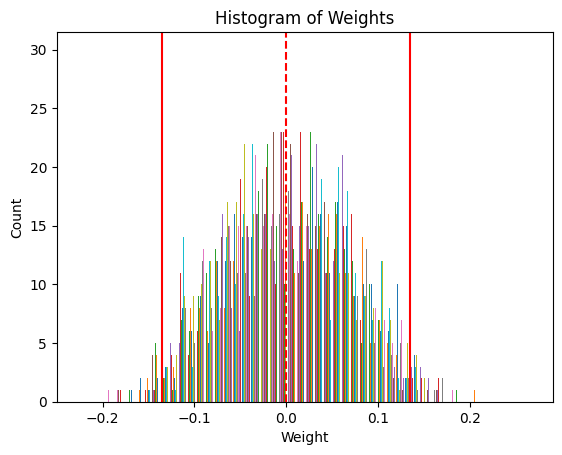

In [165]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [166]:
weights.shape

(324, 65)

In [173]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.5 * weight_std
        threshold_lower = weight_mean - 1.5 * weight_std
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        nodes_with_weight_below_lower_threshold = np.sum(weight[:, i] < threshold_lower)
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper, nodes_with_weight_below_lower_threshold, threshold_lower)

    return num




In [174]:
we = Tweights(weights)
we

0 22 0.10959332599304616 25 -0.10311849997378886
1 25 0.10685926442965865 26 -0.09450366580858827
2 22 0.10437707393430173 26 -0.10577663988806307
3 23 0.09942058857996017 15 -0.10325854632537812
4 22 0.09420484118163586 20 -0.10762271471321583
5 21 0.10502833966165781 27 -0.10328216012567282
6 25 0.10528201353736222 18 -0.10121600585989654
7 18 0.11169970408082008 25 -0.09454909339547157
8 22 0.09743916103616357 22 -0.1012390567921102
9 23 0.10370100848376751 18 -0.09285703487694263
10 25 0.11028724443167448 20 -0.10127040464431047
11 23 0.10955709032714367 22 -0.09482421912252903
12 25 0.10069510294124484 23 -0.10996069805696607
13 22 0.09832921391353011 28 -0.10249052429571748
14 21 0.10762936994433403 25 -0.09398845955729485
15 21 0.09534871531650424 23 -0.1034298394806683
16 27 0.10480935062514618 18 -0.10335344885243103
17 24 0.10171188646927476 21 -0.09585426514968276
18 24 0.1045512855052948 26 -0.0953737124800682
19 20 0.09613645375793567 25 -0.09603490381414304
20 23 0.109502

[47,
 51,
 48,
 38,
 42,
 48,
 43,
 43,
 44,
 41,
 45,
 45,
 48,
 50,
 46,
 44,
 45,
 45,
 50,
 45,
 45,
 44,
 44,
 46,
 45,
 46,
 45,
 37,
 43,
 41,
 47,
 44,
 47,
 43,
 46,
 49,
 44,
 43,
 47,
 45,
 41,
 37,
 41,
 45,
 39,
 53,
 43,
 42,
 48,
 44,
 48,
 47,
 37,
 44,
 42,
 43,
 48,
 45,
 43,
 40,
 46,
 40,
 50,
 48,
 41]

In [175]:
len(we)

65

In [176]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.5 * weight_std
    threshold_lower = weight_mean - 1.5 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if (nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold) > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper or weight_value < threshold_lower:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[ 0.97188166  0.65278609  0.00634758 ... -0.07355615  1.67076711
  -1.02738297]
 [ 1.12771431 -0.05100496 -0.12472821 ...  0.5464062  -0.64129912
  -1.53656707]
 [-0.92116508  2.29312733  0.61447533 ... -0.95785291 -0.51379583
  -0.54870194]
 ...
 [ 0.10008178  0.46628117  0.6705335  ...  0.55169785 -0.44133804
   0.36926602]
 [ 0.51900502 -0.33234825  0.19518682 ...  0.95657356  1.369339
  -0.69981978]
 [ 0.92946864 -0.41542423 -0.37615764 ... -1.51501573 -1.19117788
  -1.60424723]]


In [177]:
weight_value

0.068790205

In [178]:
number_of_zeros = np.count_nonzero( pred == 0)

In [179]:
number_of_zeros

0

In [180]:
pred.shape

(65, 708)

In [181]:
predd = pred[0,:].reshape(59,12)
predd

array([[ 9.71881659e-01,  6.52786094e-01,  6.34757556e-03,
         7.74123620e-01, -5.35916139e-01,  8.89910521e-01,
        -1.68595275e+00,  1.18906598e+00,  2.27432396e-01,
         4.35788016e-01, -1.14870747e-02,  2.68423772e+00],
       [ 6.34820883e-01, -1.66200849e+00, -4.30234475e-01,
        -2.48089197e+00, -3.56883347e-01,  4.21346579e-01,
         1.34821643e-01,  1.02855647e+00,  5.76345741e-01,
        -6.95889575e-01, -1.14662024e-02,  9.17049786e-01],
       [ 3.18418150e-01, -6.76870541e-01, -1.00081292e+00,
        -7.49233240e-02,  5.28083147e-01, -2.18123309e-02,
         7.67628348e-01,  2.10322159e-01, -2.74958341e-01,
        -5.27042290e-01, -7.29781695e-01,  5.50531215e-01],
       [ 1.26099584e+00, -1.52746477e+00,  4.50593010e-02,
        -2.07691696e+00, -7.69857223e-01,  6.08737271e-02,
         8.82551624e-01,  3.02851671e-02, -1.26718800e+00,
        -5.07926343e-01,  1.10893534e+00,  6.77787934e-05],
       [ 4.78896670e-01,  2.94292941e-01,  9.7749475

In [182]:
df = pd.read_csv("enso_index.csv")
df

year  january  february  march  april   may  june  july  august  \
0   1958     1.54      1.40   0.99   0.31  0.32  0.30  0.04    0.24   
1   1959     0.43      0.50   0.26   0.27 -0.01 -0.33 -0.28   -0.41   
2   1960     0.02     -0.24  -0.08   0.01  0.05 -0.20 -0.25    0.00   
3   1961    -0.15      0.04  -0.10   0.13 -0.01  0.10 -0.32   -0.25   
4   1962    -0.25     -0.16  -0.41  -0.32 -0.42 -0.22 -0.30   -0.13   
5   1963    -0.32     -0.26  -0.06  -0.06  0.00  0.12  0.72    0.90   
6   1964     0.76      0.55  -0.16  -0.53 -0.74 -0.88 -0.65   -0.76   
7   1965    -0.57     -0.36  -0.34  -0.09  0.19  0.45  0.81    1.25   
8   1966     1.13      0.83   0.83   0.54 -0.06  0.14  0.23   -0.10   
9   1967    -0.55     -0.56  -0.47  -0.53 -0.24 -0.12 -0.10   -0.31   
10  1968    -0.60     -0.74  -0.76  -0.47 -0.44  0.19  0.31    0.33   
11  1969     0.90      1.02   0.61   0.33  0.39  0.26  0.10    0.52   
12  1970     0.55      0.36   0.26   0.18  0.01 -0.30 -0.98   -0.95   
13  1971    -1.47     -1.28  -1.29  -0.97 -0.82 -0.78 -0.64   -0.65   
14  1972    -0.58     -0.22  -0.25   0.21  0.33  0.66  0.83    1.30   
15  1973     1.60      1.08   0.58  -0.07 -0.56 -0.86 -1.14   -1.21   
16  1974    -2.02     -1.50  -1.44  -1.00 -0.79 -0.70 -0.65   -0.32   
17  1975    -0.37     -0.33  -0.59  -0.59 -1.00 -1.25 -1.24   -1.16   
18  1976    -1.80     -1.05  -0.68  -0.42 -0.49  0.00  0.15    0.31   
19  1977     0.84      0.55   0.40  -0.25 -0.03  0.36  0.45    0.25   
20  1978     0.72      0.51   0.06  -0.37 -0.49 -0.45 -0.48   -0.62   
21  1979     0.05      0.09   0.13   0.17 -0.09  0.04 -0.20    0.21   
22  1980     0.55      0.33   0.09   0.20  0.13  0.37  0.02   -0.23   
23  1981    -0.45     -0.45  -0.02  -0.17 -0.11 -0.15 -0.43   -0.18   
24  1982    -0.04     -0.13  -0.02   0.24  0.65  0.92  0.64    0.93   
25  1983     2.43      2.22   1.69   1.12  1.12  0.62 -0.11   -0.13   
26  1984    -0.80     -0.53  -0.48  -0.60 -0.64 -0.90 -0.40   -0.40   
27  1985    -0.89     -0.91  -0.96  -0.98 -0.90 -0.76 -0.61   -0.49   
28  1986    -0.79     -0.64  -0.51  -0.41 -0.47 -0.08  0.16    0.24   
29  1987     1.19      1.17   1.24   0.89  0.91  1.24  1.34    1.48   
30  1988     0.69      0.35   0.29  -0.49 -1.05 -1.46 -1.54   -1.44   
31  1989    -1.95     -1.37  -1.33  -1.11 -0.80 -0.64 -0.47   -0.58   
32  1990     0.02      0.36   0.20   0.26  0.32  0.00  0.15    0.17   
33  1991     0.51      0.32   0.10   0.21  0.44  0.65  0.62    0.43   
34  1992     1.61      1.62   1.50   1.41  1.27  0.53  0.27   -0.15   
35  1993     0.28      0.42   0.47   0.92  0.93  0.64  0.33    0.16   
36  1994     0.03     -0.16  -0.06   0.03  0.14  0.27  0.16    0.52   
37  1995     1.10      0.87   0.49   0.27  0.03  0.08  0.03   -0.38   
38  1996    -0.65     -0.66  -0.48  -0.34 -0.40 -0.12 -0.14   -0.30   
39  1997    -0.43     -0.24  -0.06   0.34  0.87  1.15  1.60    1.94   
40  1998     2.42      2.08   1.49   0.90  0.68 -0.39 -0.73   -0.83   
41  1999    -1.53     -1.41  -0.92  -0.81 -0.87 -0.95 -0.84   -0.98   
42  2000    -1.79     -1.53  -1.26  -0.80 -0.80 -0.75 -0.57   -0.36   
43  2001    -0.88     -0.63  -0.48  -0.30 -0.30 -0.11  0.01   -0.07   
44  2002    -0.14      0.00   0.11   0.14  0.21  0.68  0.57    0.70   
45  2003     0.98      0.64   0.48  -0.03 -0.52 -0.19  0.14    0.05   
46  2004     0.26      0.17  -0.10   0.06  0.10  0.14  0.41    0.66   
47  2005     0.56      0.26   0.28   0.28  0.30  0.22 -0.01   -0.04   
48  2006    -0.98     -0.71  -0.73  -0.30 -0.11  0.09  0.03    0.37   
49  2007     0.59      0.12  -0.15  -0.16 -0.39 -0.16 -0.37   -0.57   
50  2008    -1.79     -1.70  -1.17  -0.89 -0.64 -0.44 -0.04   -0.04   
51  2009    -1.00     -0.71  -0.72  -0.25  0.17  0.49  0.69    0.62   
52  2010     1.43      1.18   1.07   0.56 -0.15 -0.62 -0.89   -1.33   
53  2011    -1.70     -1.26  -0.98  -0.74 -0.53 -0.25 -0.23   -0.66   
54  2012    -0.93     -0.61  -0.48  -0.29 -0.18  0.14  0.44    0.66   
55  2013    -0.42     -0.40 

In [183]:
pred_pres = pred[0,:].reshape(59,12)
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
df_pres = df_pres.reset_index()
df_pres['enso_avg'] = df['avg'].copy()
df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
df_pres.index = df_pres.index + 1  # shifting index
df_pres = df_pres.sort_index() 
df_pres= df_pres.drop('index',axis=1)
df_6 = df_pres.iloc[1:, :5]
df_6 = df_6.reset_index()
df_12 = df_pres.iloc[0:-1, 5:12]
df_12 = df_12.reset_index()
df_13 = df_pres.iloc[1:, [12]]
df_13 = df_13.reset_index()
df_last = pd.concat([df_6, df_12, df_13], axis=1)
df_last = df_last.drop('index',axis=1)
correlation = df_last.corr(method='pearson')

In [103]:
df_12

index      June      July    August  September   October  November  \
0       0  0.437700  0.105824 -0.045566   0.002828 -0.395444  0.254711   
1       1  0.437700  0.105824 -0.045566   0.002828 -0.395444  0.254711   
2       2 -0.176283 -0.160831 -0.218392   0.204801  0.109149  0.397507   
3       3  0.149903  0.216019  0.172399   0.236073  0.347185  0.185218   
4       4  0.071336  0.150688  0.433236   0.287677  0.251501  0.036189   
5       5  0.092722  0.145914  0.140230   0.017665  0.108724  0.017086   
6       6  0.286621  0.031290 -0.024263   0.201496 -0.354279 -0.018645   
7       7 -0.060482 -0.023411  0.178662   0.207078  0.024081  0.059867   
8       8  0.188713  0.193055  0.297784   0.496777 -0.070256  0.148051   
9       9  0.113856  0.235171  0.140952   0.269198  0.475907  0.528950   
10     10  0.213934  0.115897  0.528563   0.281248  0.061723  0.396541   
11     11 -0.042817  0.542381  0.163668  -0.025324  0.041471  0.083977   
12     12  0.466936 -0.345331 -0.051242   0.008643  0.141870  0.279285   
13     13  0.157554  0.292348  0.203979   0.180631 -0.182162  0.364505   
14     14  0.121004  0.396312 -0.272437   0.291004 -0.160891  0.121614   
15     15  0.064022  0.095102  0.218707   0.354778  0.367978 -0.259544   
16     16 -0.162090  0.152371 -0.232760   0.167929 -0.125911  0.101331   
17     17  0.089146  0.196519  0.230044   0.238462  0.245193 -0.077841   
18     18  0.080239  0.207821 -0.186161   0.207604 -0.397658  0.053901   
19     19 -0.041970  0.164344 -0.116141   0.086730  0.158395  0.187497   
20     20  0.018670  0.277015  0.444766  -0.130126 -0.070579  0.127853   
21     21  0.234465  0.245634 -0.214695  -0.314528  0.018561  0.058387   
22     22  0.186839  0.153314  0.188044  -0.014031 -0.036280  0.050126   
23     23  0.111575  0.292828  0.023628   0.002037  0.061362 -0.061375   
24     24  0.013349  0.167465 -0.227151   0.048034  0.017027 -0.151059   
25     25  0.015205  0.035611  0.204077   0.248293 -0.223489  0.359124   
26     26 -0.350846 -0.131542 -0.118020  -0.075785 -0.087708  0.001399   
27     27 -0.001433 -0.067763 -0.098339   0.170528  0.077712 -0.057696   
28     28  0.247785  0.431663  0.010882  -0.002289 -0.147289  0.732696   
29     29  0.116489  0.282699  0.503203   0.476538  0.131785  0.200605   
30     30  0.045035  0.088473  0.335019  -0.212180  0.325448  0.248076   
31     31  0.097686  0.394180  0.329719   0.202957  0.526966  0.204969   
32     32 -0.134512 -0.052329  0.404996   0.028483  0.290197  0.275449   
33     33 -0.007400  0.054444  0.308981   0.213671 -0.055431 -0.020196   
34     34  0.033554  0.033358 -0.101255   0.331534  0.582626  0.094735   
35     35 -0.074801  0.031388  0.364455   0.122819  0.084215 -0.018924   
36     36 -0.145617  0.182488  0.065975   0.385087  0.377758  0.048629   
37     37 -0.353366  0.325538  0.420547  -0.184400 -0.043711 -0.342410   
38     38 -0.081424  0.215549 -0.232682   0.463603  0.151337  0.522555   
39     39 -0.098731  0.255000  0.106019  -0.056591 -0.115202  0.266225   
40     40 -0.038526  0.057149 -0.016176   0.003400  0.305919 -0.002818   
41     41  0.499824  0.357430  0.323799   0.230076 -0.039382  0.150731   
42     42  0.084920  0.552482  0.563251   0.316659  0.169615  0.258640   
43     43  0.171233  0.432504  0.388368   0.459471  0.082198  0.224998   
44     44  0.241075  0.321004  0.250663   0.123132  0.390300  0.297249   
45     45  0.147788  0.301518  0.207418   0.694012  0.080667  0.443757   
46     46  0.382222  0.320405  0.382254   0.375093  0.784056  0.349252   
47     47  0.285297  0.422980  0.436322  -0.165461  0.477228  0.599150   
48     48  0.118837  0.407207  0.471090   0.363409  0.082809  0.344580   
49     49  0.353625  0.346450  0.318563   0.390005  0.518750  0.284412   
50     50  0.236588  0.331475  0.515108   0.456003  0.262150  0.640499   
51     51  0.331003  0.601998  0.015267   0.497535  0.223562  0.404686   
52     52  0.370648  0.447481  0.385405   0.041650  0.455792 -0.060666   
53     5

In [184]:
df_pres

January  February     March     April       May      June      July  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.889911 -1.685953   
1   0.971882  0.652786  0.006348  0.774124 -0.535916  0.889911 -1.685953   
2   0.634821 -1.662008 -0.430234 -2.480892 -0.356883  0.421347  0.134822   
3   0.318418 -0.676871 -1.000813 -0.074923  0.528083 -0.021812  0.767628   
4   1.260996 -1.527465  0.045059 -2.076917 -0.769857  0.060874  0.882552   
5   0.478897  0.294293  0.977495  0.777819  1.136772  1.404460  1.501121   
6   0.899699  1.363301 -0.767724  0.929906 -0.402971  0.424262  0.304195   
7  -1.171877  0.870913  0.109593 -1.825411  0.324104  0.211561  0.637274   
8   0.284843 -0.585645  0.699357 -0.764622 -1.841565  0.297703  0.323641   
9  -0.246871 -2.047026 -0.783007 -1.307597  0.913911 -0.355256  2.365065   
10 -1.274058 -0.600634 -0.504300  0.069719 -2.259410  0.248840 -0.529965   
11  0.182456  2.202690 -0.672443  0.294346  1.128989  0.256883 -0.944789   
12 -0.285131  1.459525 -0.362844  0.710393 -1.659785 -0.460874  0.939091   
13  0.615250  0.381173  1.764648  1.457350  0.618739 -0.192762  1.460885   
14  0.340423  0.570114  0.150992  0.583653  1.090224  0.141277 -0.723171   
15 -1.343964  0.874232 -0.633216  0.205650  0.370499 -0.042080  0.278405   
16 -0.687748 -0.559247  0.288029  0.589681  0.570101 -0.390899  0.058724   
17 -0.794707  0.744047  0.311189 -0.367745 -1.556358  0.142390  1.101185   
18 -0.782677 -0.154816  0.862243  0.022845  0.616699 -0.574796  1.145546   
19 -0.185211 -0.640866 -0.789311  1.671991  0.815852  0.668711  0.139875   
20 -0.613789  0.025180 -0.289457  1.228194  2.871388  1.023537 -0.718739   
21  1.746923 -0.554142  0.478857  0.481927 -0.397807  0.187452 -1.372605   
22  1.739283 -1.632899  0.165355 -0.153180  1.357228  1.358260  0.879198   
23  0.060909  0.597284 -0.551949 -0.663854 -0.307334  0.278368 -1.000059   
24  1.933199  0.218755  0.775623 -0.416642  0.431853  1.017973  0.776474   
25 -0.022906 -0.402326  0.301718  3.190412  0.236073 -1.518583  0.333648   
26 -0.529768  1.935050 -0.215402 -0.291404 -0.777241  0.518920  1.362064   
27  2.040476  1.550761  1.424679  0.327383  2.055880  0.815547  0.786548   
28  0.265180 -0.295564 -0.894799 -1.147848  1.692767  0.185177  0.120461   
29 -0.267370  0.313954 -0.801753 -0.465099 -1.018209 -0.083625  0.518467   
30 -1.640253 -0.009409  1.337704 -0.356141  1.062681  0.324032 -0.252848   
31 -0.217156 -0.260283 -0.669725  1.279426 -0.630716  2.595840  0.989027   
32 -0.846782 -0.318742  0.217765  0.855770 -0.641322  0.374952  0.259288   
33 -2.465200 -0.537988 -0.309436 -0.618282 -0.956067 -0.149932 -1.135033   
34 -1.284153 -0.937029 -0.387499 -0.554835  0.795782  0.116181 -1.487796   
35  0.182587 -1.746701 -0.536603  0.554236 -1.183221 -0.987734  0.709288   
36 -1.137124  0.648217 -0.767833 -0.113891  0.506412  0.862826  0.474707   
37  1.214609 -0.795447  0.712450  1.373845 -0.240989 -0.334142 -1.096539   
38  0.794365  1.892464  0.573554  1.824665  0.410697  1.574773 -0.915059   
39 -0.467968 -0.555149 -0.080735 -0.322379  1.303348 -0.111484  0.036068   
40  1.104583 -1.597603  0.222885  1.131587 -0.170890 -0.135640  0.984428   
41 -0.692657  0.620131  0.187692  0.255873  0.596031 -0.256776 -0.046238   
42 -0.625773  0.894034  0.516945 -0.114990 -1.230181 -0.914953 -0.874140   
43  1.106509  1.512769  1.916970 -0.619819  0.750913 -1.381855  0.594254   
44 -0.590204  0.356840  0.009958 -1.034048 -1.174777  0.194958 -0.060481   
45 -0.821343  1.212580 -1.752517 -2.192768 -3.794760 -1.472332 -0.942574   
46  1.009275 -1.419662 -0.405625 -1.126416 -2.343435 -1.218839 -0.527653   
47  1.579600 -1.059313 -1.587295 -1.032295  0.211775 -1.595926  0.770208   
48  1.255849 -0.529186 -0.767971 -0.166126 -1.416427 -0.543841 -0.142734   
49 -1.126691  0.005811 -0.355398  0.071028  0.892105 -0.602332 -2.142668   
50 -0.691971  0.725966  0.817947 -0.208754  0.898949 -1.229604 -1.711307   
51 -0.013762  0.262758  0.397017 -1.578704 -0.115650 

In [185]:
df_last

January  February     March     April       May      June      July  \
0   0.971882  0.652786  0.006348  0.774124 -0.535916  0.889911 -1.685953   
1   0.634821 -1.662008 -0.430234 -2.480892 -0.356883  0.889911 -1.685953   
2   0.318418 -0.676871 -1.000813 -0.074923  0.528083  0.421347  0.134822   
3   1.260996 -1.527465  0.045059 -2.076917 -0.769857 -0.021812  0.767628   
4   0.478897  0.294293  0.977495  0.777819  1.136772  0.060874  0.882552   
5   0.899699  1.363301 -0.767724  0.929906 -0.402971  1.404460  1.501121   
6  -1.171877  0.870913  0.109593 -1.825411  0.324104  0.424262  0.304195   
7   0.284843 -0.585645  0.699357 -0.764622 -1.841565  0.211561  0.637274   
8  -0.246871 -2.047026 -0.783007 -1.307597  0.913911  0.297703  0.323641   
9  -1.274058 -0.600634 -0.504300  0.069719 -2.259410 -0.355256  2.365065   
10  0.182456  2.202690 -0.672443  0.294346  1.128989  0.248840 -0.529965   
11 -0.285131  1.459525 -0.362844  0.710393 -1.659785  0.256883 -0.944789   
12  0.615250  0.381173  1.764648  1.457350  0.618739 -0.460874  0.939091   
13  0.340423  0.570114  0.150992  0.583653  1.090224 -0.192762  1.460885   
14 -1.343964  0.874232 -0.633216  0.205650  0.370499  0.141277 -0.723171   
15 -0.687748 -0.559247  0.288029  0.589681  0.570101 -0.042080  0.278405   
16 -0.794707  0.744047  0.311189 -0.367745 -1.556358 -0.390899  0.058724   
17 -0.782677 -0.154816  0.862243  0.022845  0.616699  0.142390  1.101185   
18 -0.185211 -0.640866 -0.789311  1.671991  0.815852 -0.574796  1.145546   
19 -0.613789  0.025180 -0.289457  1.228194  2.871388  0.668711  0.139875   
20  1.746923 -0.554142  0.478857  0.481927 -0.397807  1.023537 -0.718739   
21  1.739283 -1.632899  0.165355 -0.153180  1.357228  0.187452 -1.372605   
22  0.060909  0.597284 -0.551949 -0.663854 -0.307334  1.358260  0.879198   
23  1.933199  0.218755  0.775623 -0.416642  0.431853  0.278368 -1.000059   
24 -0.022906 -0.402326  0.301718  3.190412  0.236073  1.017973  0.776474   
25 -0.529768  1.935050 -0.215402 -0.291404 -0.777241 -1.518583  0.333648   
26  2.040476  1.550761  1.424679  0.327383  2.055880  0.518920  1.362064   
27  0.265180 -0.295564 -0.894799 -1.147848  1.692767  0.815547  0.786548   
28 -0.267370  0.313954 -0.801753 -0.465099 -1.018209  0.185177  0.120461   
29 -1.640253 -0.009409  1.337704 -0.356141  1.062681 -0.083625  0.518467   
30 -0.217156 -0.260283 -0.669725  1.279426 -0.630716  0.324032 -0.252848   
31 -0.846782 -0.318742  0.217765  0.855770 -0.641322  2.595840  0.989027   
32 -2.465200 -0.537988 -0.309436 -0.618282 -0.956067  0.374952  0.259288   
33 -1.284153 -0.937029 -0.387499 -0.554835  0.795782 -0.149932 -1.135033   
34  0.182587 -1.746701 -0.536603  0.554236 -1.183221  0.116181 -1.487796   
35 -1.137124  0.648217 -0.767833 -0.113891  0.506412 -0.987734  0.709288   
36  1.214609 -0.795447  0.712450  1.373845 -0.240989  0.862826  0.474707   
37  0.794365  1.892464  0.573554  1.824665  0.410697 -0.334142 -1.096539   
38 -0.467968 -0.555149 -0.080735 -0.322379  1.303348  1.574773 -0.915059   
39  1.104583 -1.597603  0.222885  1.131587 -0.170890 -0.111484  0.036068   
40 -0.692657  0.620131  0.187692  0.255873  0.596031 -0.135640  0.984428   
41 -0.625773  0.894034  0.516945 -0.114990 -1.230181 -0.256776 -0.046238   
42  1.106509  1.512769  1.916970 -0.619819  0.750913 -0.914953 -0.874140   
43 -0.590204  0.356840  0.009958 -1.034048 -1.174777 -1.381855  0.594254   
44 -0.821343  1.212580 -1.752517 -2.192768 -3.794760  0.194958 -0.060481   
45  1.009275 -1.419662 -0.405625 -1.126416 -2.343435 -1.472332 -0.942574   
46  1.579600 -1.059313 -1.587295 -1.032295  0.211775 -1.218839 -0.527653   
47  1.255849 -0.529186 -0.767971 -0.166126 -1.416427 -1.595926  0.770208   
48 -1.126691  0.005811 -0.355398  0.071028  0.892105 -0.543841 -0.142734   
49 -0.691971  0.725966  0.817947 -0.208754  0.898949 -0.602332 -2.142668   
50 -0.013762  0.262758  0.397017 -1.578704 -0.115650 -1.229604 -1.711307   
51 -0.064704 -0.400290  0.904866  1.310461 -0.141162 

In [186]:
correlation

January  February     March     April       May      June  \
January    1.000000 -0.113930  0.154171  0.092067  0.109438 -0.007962   
February  -0.113930  1.000000  0.135697  0.188417  0.054110 -0.078847   
March      0.154171  0.135697  1.000000  0.197786  0.248922  0.017061   
April      0.092067  0.188417  0.197786  1.000000  0.265854  0.148369   
May        0.109438  0.054110  0.248922  0.265854  1.000000  0.138866   
June      -0.007962 -0.078847  0.017061  0.148369  0.138866  1.000000   
July      -0.130002  0.107427 -0.013567  0.128176  0.031126  0.142811   
August    -0.081678  0.147525  0.035288  0.288022  0.198394  0.426976   
September -0.139232 -0.053535 -0.031890  0.092679  0.071009  0.117208   
October    0.074121  0.026843  0.178784  0.055192  0.215292  0.157565   
November  -0.010745  0.187175 -0.092595  0.099497  0.104138  0.253340   
December   0.013937  0.113165 -0.015270 -0.035720  0.054860  0.337942   
enso_avg  -0.051306 -0.054862 -0.203420  0.140300 -0.092866 -0.043964   

               July    August  September   October  November  December  \
January   -0.130002 -0.081678  -0.139232  0.074121 -0.010745  0.013937   
February   0.107427  0.147525  -0.053535  0.026843  0.187175  0.113165   
March     -0.013567  0.035288  -0.031890  0.178784 -0.092595 -0.015270   
April      0.128176  0.288022   0.092679  0.055192  0.099497 -0.035720   
May        0.031126  0.198394   0.071009  0.215292  0.104138  0.054860   
June       0.142811  0.426976   0.117208  0.157565  0.253340  0.337942   
July       1.000000  0.028514   0.207305  0.212069  0.251293  0.135515   
August     0.028514  1.000000   0.338144  0.408624  0.262587  0.361539   
September  0.207305  0.338144   1.000000  0.419309 -0.137252  0.105968   
October    0.212069  0.408624   0.419309  1.000000  0.046363  0.072885   
November   0.251293  0.262587  -0.137252  0.046363  1.000000  0.243564   
December   0.135515  0.361539   0.105968  0.072885  0.243564  1.000000   
enso_avg  -0.071513  0.029846  -0.189713 -0.101526  0.235707 -0.045525   

           enso_avg  
January   -0.051306  
February  -0.054862  
March     -0.203420  
April      0.140300  
May       -0.092866  
June      -0.043964  
July      -0.071513  
August     0.029846  
September -0.189713  
October   -0.101526  
November   0.235707  
December  -0.045525  
enso_avg   1.000000

In [188]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [190]:
top_predp,resultp = potential_predictors_new(pred)

0 0.2357069939579258 November 0.2357069939579258
1 0.2595983094407265 March 0.2595983094407265
2 0.4195385398506867 December 0.4195385398506867
3 -0.2891418203957604 June 0.2891418203957604
4 -0.2362124137793096 March_2 0.2362124137793096
5 -0.17319602192964817 November_2 0.17319602192964817
6 -0.24635577691462282 January 0.24635577691462282
7 -0.3486810734565431 August 0.3486810734565431
8 -0.20837307934048266 January_2 0.20837307934048266
9 -0.3205925951175579 January_3 0.3205925951175579
10 0.2200700230492878 May 0.2200700230492878
11 -0.1640273107313914 March_3 0.1640273107313914
12 0.3486658363143618 November_3 0.3486658363143618
13 0.24240269169441425 May_2 0.24240269169441425
14 -0.23071616206232637 February 0.23071616206232637
15 0.4210313367751918 March_4 0.4210313367751918
16 0.2151188467424385 April 0.2151188467424385
17 -0.3744530121426485 May_3 0.3744530121426485
18 -0.20901467850740216 July 0.20901467850740216
19 -0.29180776722483487 December_2 0.29180776722483487
20 -0.2

In [191]:
resultp = resultp.sort_values(by='Absolute_Correlation', ascending=False)
resultp

Iteration  Correlation  Column_Name  Absolute_Correlation
29         29     0.507422        May_5              0.507422
58         58    -0.469152      March_8              0.469152
52         52    -0.437212   November_8              0.437212
15         15     0.421031      March_4              0.421031
2           2     0.419539     December              0.419539
..        ...          ...          ...                   ...
22         22     0.185350      March_5              0.185350
64         64     0.182445  November_10              0.182445
27         27    -0.173593   November_4              0.173593
5           5    -0.173196   November_2              0.173196
11         11    -0.164027      March_3              0.164027

[65 rows x 4 columns]

In [192]:
top_predp['May_5']

0    -0.312332
1    -1.079802
2    -0.911568
3    -0.093692
4     0.726431
5     0.433769
6    -2.050020
7     0.916463
8    -0.983406
9    -1.444330
10   -0.585106
11    1.343683
12   -0.576298
13    0.167150
14    0.989686
15   -1.451178
16   -2.087011
17   -0.376251
18   -0.180404
19    0.266550
20   -0.118661
21    0.335970
22    0.329413
23   -1.140398
24    0.513146
25   -0.399709
26   -0.047943
27    0.586794
28    0.862442
29    1.691384
30    0.660299
31   -0.327562
32   -1.063382
33    1.665411
34    1.356722
35   -0.189047
36   -1.128625
37   -0.109755
38   -0.335027
39    1.575014
40    1.318597
41    0.151983
42   -0.924396
43   -0.057043
44    0.222847
45   -0.087061
46    0.757384
47   -0.944166
48   -0.478318
49    0.693955
50   -0.223412
51    0.743602
52   -0.873309
53   -1.297711
54    0.928520
55    0.829920
56    0.732745
57    1.263001
58   -0.185954
Name: May_5, dtype: float64

In [193]:
unique_values_listp = resultp['Column_Name'].unique().tolist()

In [194]:
top_predp = top_predp[unique_values_listp]

In [195]:
top_predp

May_5   March_8  November_8   March_4  December     May_6     May_3  \
0  -0.312332 -0.827381    1.446439  1.401656  0.373327  0.615926 -2.133548   
1  -1.079802  0.558206    1.446439 -0.404016  0.373327 -0.283303  0.207681   
2  -0.911568 -1.320013    1.669549  0.827126  0.677821 -1.253839  0.207294   
3  -0.093692  0.806794    0.058867 -1.891762 -1.003555 -0.936325 -1.092931   
4   0.726431  0.993602    0.600442  1.228956  1.780972 -0.390842 -0.163150   
5   0.433769 -0.392853   -0.029324  2.201691  2.193896 -0.319883  0.057624   
6  -2.050020  0.104793    0.937597  0.864621 -1.151653 -2.041983  1.076205   
7   0.916463  0.378544   -0.895362  1.126544  1.041156 -1.208556 -0.923990   
8  -0.983406  0.001508    0.274363 -0.658304 -0.674420 -1.635714  1.169932   
9  -1.444330  0.447197   -0.145231  3.081958 -0.458141 -1.809878 -1.152771   
10 -0.585106  1.102435    0.163524  1.044789 -0.053417 -0.954881 -0.011940   
11  1.343683  1.047167    1.969296 -0.496375  0.171287 -1.459563 -0.225243   
12 -0.576298  1.272748    0.486220 -1.095736 -0.474680  1.618678 -1.377064   
13  0.167150  0.213383   -0.631866 -0.248912 -0.224423  0.913135  0.842530   
14  0.989686  0.411644   -1.921590  1.379996  1.821590 -1.500892 -0.307248   
15 -1.451178  1.129647    2.282287  0.168718 -1.878472 -0.654477  0.476548   
16 -2.087011  1.226183   -0.518975 -0.508523 -0.460138 -0.290048  1.280259   
17 -0.376251  1.471680    0.377147 -1.222512  0.236487  0.222330  0.533238   
18 -0.180404 -0.095044   -0.516789  0.949185 -0.718955 -2.303589  0.590455   
19  0.266550  1.397382   -1.113510 -0.586515 -0.606903  0.067601  1.536388   
20 -0.118661 -0.308984    0.556983 -2.286660  0.443733  1.873053  1.381357   
21  0.335970  0.554432    0.305190 -0.011539  0.103836  0.039712  0.953417   
22  0.329413  0.035186    0.786293  0.012041 -0.005139  0.009863 -1.661349   
23 -1.140398  0.587648   -1.437274 -0.931256 -1.746876  0.367461 -0.000492   
24  0.513146 -1.225278   -1.145970  0.939786  0.345015 -1.081827  0.464197   
25 -0.399709 -0.285352    2.278710 -3.094195 -0.863921  2.074241 -0.825701   
26 -0.047943  0.457670    0.390603  0.316153 -1.012010  0.756201 -0.783473   
27  0.586794  1.030740    1.430190  0.231893  0.303717 -0.328876  0.231124   
28  0.862442  0.069863   -0.098400  0.159065  0.195797 -0.437968  1.809809   
29  1.691384 -0.712473   -0.732316  0.679289  1.522409 -0.992927 -0.543588   
30  0.660299  0.785261   -0.044442 -0.960566 -0.502980  1.377970  0.885362   
31 -0.327562 -1.056724   -0.860675 -0.014316 -0.611127  0.794622  0.888005   
32 -1.063382  0.030051    0.677536  1.003796 -0.049485  3.604895 -0.523217   
33  1.665411 -1.250980   -0.363715  1.536088  0.677849 -1.657021  0.763331   
34  1.356722  0.902115    0.401644 -2.503359 -0.844985 -0.291464 -1.386323   
35 -0.189047 -1.037265    0.280868  0.977760 -0.263034  0.204723 -1.462859   
36 -1.128625 -2.524311    0.453070 -0.287037  0.941221  0.098199  0.260222   
37 -0.109755  0.054178    0.156259 -0.202865 -0.460578 -0.199765  1.260689   
38 -0.335027  0.565071    0.706986  1.963727  0.599329 -0.707506  0.432986   
39  1.575014 -2.068003   -1.922634  0.843345  2.110298 -2.606203 -1.840219   
40  1.318597 -1.295565    1.505105 -0.769390  1.464527  0.827833 -0.248209   
41  0.151983 -1.296146    1.470325 -1.588343  0.953624  0.498639  1.112907   
42 -0.924396  1.998465    0.044057 -2.120454  0.415689  0.351856  0.994081   
43 -0.057043  1.172265    0.733464 -1.080276  0.811802  2.027805 -0.264536   
44  0.222847 -0.899142   -1.609754  0.662547  1.181464  1.621613 -0.230613   
45 -0.087061 -0.011259   -0.292839  0.834711 -0.677114  0.053510 -0.155302   
46  0.757384 -1.322270    0.365412  0.446703  1.640164  1.774611  0.618310   
47 -0.944166 -0.431624    1.612667  0.463063 -2.945678  0.642729 -0.875269   
48 -0.478318  0.340386    0.660407 -1.245800 -0.562475 -0.748399  1.177078   
49  0.693955 -0.197551    0.117061 -0.522707 -1.955157  1.720393  1.512672   
50 -0.223412  0.770787   -3.0

In [196]:
top_predp.to_csv('pearson_normalized_corr.csv', index=False)

In [197]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [198]:
top_predk,resultk = potential_predictors_new(pred)

0 -0.2264483703961151 March 0.2264483703961151
1 0.1375074083800699 March_2 0.1375074083800699
2 0.2669008930330059 December 0.2669008930330059
3 -0.2071993774861493 June 0.2071993774861493
4 -0.1609129247000818 March_3 0.1609129247000818
5 -0.12525612085320892 November 0.12525612085320892
6 -0.1772967861240901 January 0.1772967861240901
7 -0.27977769050389656 August 0.27977769050389656
8 -0.1393035362759987 June_2 0.1393035362759987
9 0.2551947135140144 June_3 0.2551947135140144
10 0.18431844102009368 May 0.18431844102009368
11 -0.1808076135720919 February 0.1808076135720919
12 0.20602875953425018 November_2 0.20602875953425018
13 0.200702302444102 May_2 0.200702302444102
14 0.18846949025576296 November_3 0.18846949025576296
15 0.31304878078015913 March_4 0.31304878078015913
16 0.14101823582807166 April 0.14101823582807166
17 0.20251690567855274 July 0.20251690567855274
18 -0.1826164004962672 July_2 0.1826164004962672
19 -0.196663815919057 July_3 0.196663815919057
20 -0.14803989072407

In [199]:
resultk = resultk.sort_values(by='Absolute_Correlation', ascending=False)
resultk

Iteration  Correlation Column_Name  Absolute_Correlation
29         29     0.330603       May_3              0.330603
15         15     0.313049     March_4              0.313049
58         58    -0.309538     March_7              0.309538
52         52    -0.305531  November_8              0.305531
7           7    -0.279778      August              0.279778
..        ...          ...         ...                   ...
22         22     0.122915      June_4              0.122915
37         37    -0.118783     March_5              0.118783
48         48    -0.118232    August_6              0.118232
33         33    -0.116442       May_5              0.116442
27         27    -0.114721  November_4              0.114721

[65 rows x 4 columns]

In [201]:
top_predk['May_3']

0    -0.312332
1    -1.079802
2    -0.911568
3    -0.093692
4     0.726431
5     0.433769
6    -2.050020
7     0.916463
8    -0.983406
9    -1.444330
10   -0.585106
11    1.343683
12   -0.576298
13    0.167150
14    0.989686
15   -1.451178
16   -2.087011
17   -0.376251
18   -0.180404
19    0.266550
20   -0.118661
21    0.335970
22    0.329413
23   -1.140398
24    0.513146
25   -0.399709
26   -0.047943
27    0.586794
28    0.862442
29    1.691384
30    0.660299
31   -0.327562
32   -1.063382
33    1.665411
34    1.356722
35   -0.189047
36   -1.128625
37   -0.109755
38   -0.335027
39    1.575014
40    1.318597
41    0.151983
42   -0.924396
43   -0.057043
44    0.222847
45   -0.087061
46    0.757384
47   -0.944166
48   -0.478318
49    0.693955
50   -0.223412
51    0.743602
52   -0.873309
53   -1.297711
54    0.928520
55    0.829920
56    0.732745
57    1.263001
58   -0.185954
Name: May_3, dtype: float64

In [202]:
unique_values_listk = resultk['Column_Name'].unique().tolist()

In [203]:
top_predk = top_predk[unique_values_listk]

In [204]:
top_predk

May_3   March_4   March_7  November_8    August     May_4  November_6  \
0  -0.312332  1.401656 -0.827381    1.446439  0.690258  0.615926    0.092650   
1  -1.079802 -0.404016  0.558206    1.446439  0.690258 -0.283303    0.092650   
2  -0.911568  0.827126 -1.320013    1.669549  0.184361 -1.253839   -1.007547   
3  -0.093692 -1.891762  0.806794    0.058867  0.176199 -0.936325   -0.699242   
4   0.726431  1.228956  0.993602    0.600442  0.188374 -0.390842   -0.869084   
5   0.433769  2.201691 -0.392853   -0.029324  0.162665 -0.319883   -0.608323   
6  -2.050020  0.864621  0.104793    0.937597  1.289430 -2.041983    0.517134   
7   0.916463  1.126544  0.378544   -0.895362 -1.107025 -1.208556    1.377193   
8  -0.983406 -0.658304  0.001508    0.274363  1.646616 -1.635714    0.263248   
9  -1.444330  3.081958  0.447197   -0.145231  1.279037 -1.809878    0.393119   
10 -0.585106  1.044789  1.102435    0.163524 -0.581732 -0.954881   -0.848509   
11  1.343683 -0.496375  1.047167    1.969296 -0.392623 -1.459563    0.418884   
12 -0.576298 -1.095736  1.272748    0.486220  1.193265  1.618678    0.262395   
13  0.167150 -0.248912  0.213383   -0.631866  1.100980  0.913135   -0.534997   
14  0.989686  1.379996  0.411644   -1.921590 -0.409936 -1.500892   -0.938568   
15 -1.451178  0.168718  1.129647    2.282287  1.684538 -0.654477    1.605557   
16 -2.087011 -0.508523  1.226183   -0.518975 -0.713184 -0.290048    0.873169   
17 -0.376251 -1.222512  1.471680    0.377147 -0.687638  0.222330    0.351400   
18 -0.180404  0.949185 -0.095044   -0.516789 -1.584894 -2.303589   -0.447676   
19  0.266550 -0.586515  1.397382   -1.113510 -0.346413  0.067601   -0.652567   
20 -0.118661 -2.286660 -0.308984    0.556983  1.602115  1.873053    0.876227   
21  0.335970 -0.011539  0.554432    0.305190 -2.576547  0.039712    0.386265   
22  0.329413  0.012041  0.035186    0.786293 -1.425354  0.009863   -0.141611   
23 -1.140398 -0.931256  0.587648   -1.437274 -1.076156  0.367461   -1.616630   
24  0.513146  0.939786 -1.225278   -1.145970 -3.087505 -1.081827    0.629406   
25 -0.399709 -3.094195 -0.285352    2.278710  0.563446  2.074241   -0.486671   
26 -0.047943  0.316153  0.457670    0.390603  1.267064  0.756201    0.325682   
27  0.586794  0.231893  1.030740    1.430190 -1.609449 -0.328876    0.785448   
28  0.862442  0.159065  0.069863   -0.098400 -0.741020 -0.437968    2.224857   
29  1.691384  0.679289 -0.712473   -0.732316 -1.232695 -0.992927    1.041228   
30  0.660299 -0.960566  0.785261   -0.044442  0.379548  1.377970    0.198068   
31 -0.327562 -0.014316 -1.056724   -0.860675  0.198455  0.794622    3.384817   
32 -1.063382  1.003796  0.030051    0.677536  2.068935  3.604895   -0.636359   
33  1.665411  1.536088 -1.250980   -0.363715 -0.307445 -1.657021   -0.969691   
34  1.356722 -2.503359  0.902115    0.401644 -0.708337 -0.291464   -0.538870   
35 -0.189047  0.977760 -1.037265    0.280868 -0.745212  0.204723    0.825744   
36 -1.128625 -0.287037 -2.524311    0.453070 -1.381244  0.098199   -0.077643   
37 -0.109755 -0.202865  0.054178    0.156259  1.062354 -0.199765   -0.637678   
38 -0.335027  1.963727  0.565071    0.706986 -0.800595 -0.707506   -0.554292   
39  1.575014  0.843345 -2.068003   -1.922634 -0.352042 -2.606203   -1.590276   
40  1.318597 -0.769390 -1.295565    1.505105 -0.417820  0.827833   -1.638380   
41  0.151983 -1.588343 -1.296146    1.470325  0.002531  0.498639    0.885843   
42 -0.924396 -2.120454  1.998465    0.044057 -0.364211  0.351856    1.383847   
43 -0.057043 -1.080276  1.172265    0.733464  1.003946  2.027805   -0.017899   
44  0.222847  0.662547 -0.899142   -1.609754 -1.108095  1.621613   -1.122860   
45 -0.087061  0.834711 -0.011259   -0.292839 -0.026699  0.053510    0.511713   
46  0.757384  0.446703 -1.322270    0.365412 -0.869733  1.774611   -0.622842   
47 -0.944166  0.463063 -0.431624    1.612667 -1.398664  0.642729   -1.167323   
48 -0.478318 -1.245800  0.340386    0.660407 -0.131946 -0.748399    0.438950   
49  0.6

In [205]:
top_predk.to_csv('kendall_normalized_corr.csv', index=False)

In [206]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [207]:
top_preds,results = potential_predictors_new(pred)

0 -0.29729966734983926 March 0.29729966734983926
1 0.20474604044558872 March_2 0.20474604044558872
2 0.3629429389035671 December 0.3629429389035671
3 -0.3083802150986746 November 0.3083802150986746
4 -0.2590741719312224 March_3 0.2590741719312224
5 -0.18224592696695743 November_2 0.18224592696695743
6 -0.2591618450858522 January 0.2591618450858522
7 -0.3985387597896726 August 0.3985387597896726
8 -0.19805655020126212 June 0.19805655020126212
9 0.3593775118525779 June_2 0.3593775118525779
10 0.2600093522472742 May 0.2600093522472742
11 -0.25717458691424216 February 0.25717458691424216
12 0.27827865884851966 November_3 0.27827865884851966
13 0.28219066036862755 May_2 0.28219066036862755
14 0.28409439641529716 November_4 0.28409439641529716
15 0.4486235322409695 March_4 0.4486235322409695
16 0.23364895708856434 April 0.23364895708856434
17 0.2808796671070282 July 0.2808796671070282
18 -0.2570322206020511 July_2 0.2570322206020511
19 -0.28500036558399117 July_3 0.28500036558399117
20 -0.21

In [208]:
top_preds

March   March_2  December  November   March_3  November_2   January  \
0   0.006348 -0.124728  0.373327 -0.004150 -0.441616    0.288242  1.214719   
1  -0.430234  0.783433  0.373327 -0.004150 -0.011719    0.288242  0.924310   
2  -1.000813  0.820383  0.677821 -0.611404 -1.570469   -0.543679  2.258747   
3   0.045059  0.165865 -1.003555  0.840573 -1.555092    0.133380  0.142876   
4   0.977495 -0.964909  1.780972 -0.029076  0.519683    0.704293  1.557043   
5  -0.767724 -0.560918  2.193896  0.128728 -0.554363   -1.256908  0.834202   
6   0.109593 -0.468869 -1.151653  2.241025  0.220204    1.933858  2.573506   
7   0.699357  0.213312  1.041156  0.500810 -0.269140    0.287319 -1.979579   
8  -0.783007  0.178617 -0.674420  0.356399  2.327288   -1.803219  0.089346   
9  -0.504300 -1.117691 -0.458141 -1.473715 -0.124212   -0.839564  1.008634   
10 -0.672443 -0.515857 -0.053417 -1.652746 -0.428955   -1.589269  0.362117   
11 -0.362844 -0.038887  0.171287 -0.588826 -0.382200    0.613403  1.233300   
12  1.764648 -0.014740 -0.474680  0.834182  0.058379    1.187719  0.763551   
13  0.150992 -0.434005 -0.224423  0.764511  1.658828    0.090140  1.658842   
14 -0.633216  0.867657  1.821590  0.599637 -0.698759   -0.204397  0.120092   
15  0.288029  1.002391 -1.878472  0.255511  1.607326    0.807508  3.161718   
16  0.311189 -0.567026 -0.460138 -1.146606 -0.361099    0.241467  0.251262   
17  0.862243 -0.501616  0.236487  0.850050 -0.202372   -0.732360  1.197852   
18 -0.789311  1.961844 -0.718955  0.548070  0.195641    0.111969 -0.262676   
19 -0.289457 -1.282320 -0.606903 -1.068903  0.334633   -0.642852 -1.831122   
20  0.478857 -0.788156  0.443733 -0.122706  0.651997    0.552498  0.817966   
21  0.165355 -0.227682  0.103836 -0.300709 -1.341329    1.110193  0.669821   
22 -0.551949 -0.200256 -0.005139  0.589698  0.417599   -0.584741  0.736963   
23  0.775623 -1.223886 -1.746876  0.332234 -0.101973   -0.135647  0.587086   
24  0.301718  0.712846  0.345015  0.504956  0.788708   -0.408085 -1.119410   
25 -0.215402 -1.257782 -0.863921 -0.514964 -1.163601   -1.312140 -0.206170   
26  1.424679  1.281743 -1.012010  1.063528 -0.531143    0.681723 -0.823986   
27 -0.894799 -3.056483  0.303717  0.988447  0.764637   -0.158972 -1.741225   
28 -0.801753 -0.083734  0.195797 -0.189446 -0.959846    1.229510 -1.672880   
29  1.337704 -0.078011  1.522409 -0.050532 -0.564413   -0.213533  0.715141   
30 -0.669725 -1.207827 -0.502980  0.761079  1.104907   -1.784738  0.020155   
31  0.217765 -1.702136 -0.611127  1.567758 -1.053712   -0.218770 -0.782069   
32 -0.309436 -0.481562 -0.049485  0.153665 -0.554198    1.169407  0.629606   
33 -0.387499  0.108791  0.677849 -0.229478 -0.199231    0.391997 -0.059894   
34 -0.536603 -1.584987 -0.844985 -0.690967 -0.244723    0.483799 -0.545777   
35 -0.767833 -0.364809 -0.263034  0.216700 -0.662894    1.035415  2.733998   
36  0.712450 -1.091627  0.941221  0.258565 -2.180479   -0.349070 -1.484187   
37  0.573554 -0.085347 -0.460578 -0.621364 -0.848825    2.076372 -0.677944   
38 -0.080735  2.124656  0.599329  0.239621 -1.699152    1.588795  0.420207   
39  0.222885  0.696391  2.110298 -0.909845 -0.120339   -1.442870 -0.706607   
40  0.187692 -0.422061  1.464527 -1.747451  0.206541    0.391829 -1.141922   
41  0.516945  0.127153  0.953624  0.835274  0.550066   -1.404328 -2.933484   
42  1.916970 -0.952777  0.415689  0.451222  1.537619   -1.204648 -0.376432   
43  0.009958  0.376361  0.811802 -1.086922 -0.231855   -1.552521  0.352024   
44 -1.752517  1.076820  1.181464  0.343495  0.444815   -0.646551 -0.534260   
45 -0.405625  0.835019 -0.677114  2.018497  1.194717   -0.134043  0.097898   
46 -1.587295  1.895471  1.640164 -0.484011  0.469496   -0.861592 -0.781865   
47 -0.767971  0.626111 -2.945678 -1.939822 -1.341355    0.634324 -1.107223   
48 -0.355398 -1.337858 -0.562475 -0.753685 -0.936995    0.699459 -0.593936   
49  0.817947  0.928473 -1.955157  1.227418 -0.201487    0.931053  1.890738   
50  0.397017 -0.297572  0.477

In [209]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

Iteration  Correlation  Column_Name  Absolute_Correlation
29         29     0.474546        May_4              0.474546
15         15     0.448624      March_4              0.448624
58         58    -0.439301      March_6              0.439301
52         52    -0.432556  November_10              0.432556
31         31    -0.399439        May_5              0.399439
..        ...          ...          ...                   ...
48         48    -0.180434     August_6              0.180434
33         33    -0.177392        May_6              0.177392
22         22     0.175963       June_3              0.175963
27         27    -0.170147   November_5              0.170147
21         21    -0.170001     August_2              0.170001

[65 rows x 4 columns]

In [210]:
unique_values_lists = results['Column_Name'].unique().tolist()

In [211]:
top_preds = top_preds[unique_values_lists]

In [212]:
top_preds

May_4   March_4   March_6  November_10     May_5    August    July_6  \
0  -0.312332  1.401656 -0.827381     1.446439  0.615926  0.690258 -0.253021   
1  -1.079802 -0.404016  0.558206     1.446439 -0.283303  0.690258 -0.253021   
2  -0.911568  0.827126 -1.320013     1.669549 -1.253839  0.184361  1.048405   
3  -0.093692 -1.891762  0.806794     0.058867 -0.936325  0.176199 -0.159594   
4   0.726431  1.228956  0.993602     0.600442 -0.390842  0.188374 -0.770136   
5   0.433769  2.201691 -0.392853    -0.029324 -0.319883  0.162665 -0.826496   
6  -2.050020  0.864621  0.104793     0.937597 -2.041983  1.289430  1.030454   
7   0.916463  1.126544  0.378544    -0.895362 -1.208556 -1.107025 -1.265733   
8  -0.983406 -0.658304  0.001508     0.274363 -1.635714  1.646616 -0.603809   
9  -1.444330  3.081958  0.447197    -0.145231 -1.809878  1.279037 -0.597923   
10 -0.585106  1.044789  1.102435     0.163524 -0.954881 -0.581732 -0.049728   
11  1.343683 -0.496375  1.047167     1.969296 -1.459563 -0.392623  1.340168   
12 -0.576298 -1.095736  1.272748     0.486220  1.618678  1.193265 -2.426165   
13  0.167150 -0.248912  0.213383    -0.631866  0.913135  1.100980  1.409184   
14  0.989686  1.379996  0.411644    -1.921590 -1.500892 -0.409936 -1.340810   
15 -1.451178  0.168718  1.129647     2.282287 -0.654477  1.684538  1.026644   
16 -2.087011 -0.508523  1.226183    -0.518975 -0.290048 -0.713184 -1.530483   
17 -0.376251 -1.222512  1.471680     0.377147  0.222330 -0.687638  0.711510   
18 -0.180404  0.949185 -0.095044    -0.516789 -2.303589 -1.584894  0.071767   
19  0.266550 -0.586515  1.397382    -1.113510  0.067601 -0.346413  0.557319   
20 -0.118661 -2.286660 -0.308984     0.556983  1.873053  1.602115  2.023941   
21  0.335970 -0.011539  0.554432     0.305190  0.039712 -2.576547 -0.014607   
22  0.329413  0.012041  0.035186     0.786293  0.009863 -1.425354  0.182865   
23 -1.140398 -0.931256  0.587648    -1.437274  0.367461 -1.076156  0.459798   
24  0.513146  0.939786 -1.225278    -1.145970 -1.081827 -3.087505 -0.026234   
25 -0.399709 -3.094195 -0.285352     2.278710  2.074241  0.563446 -0.451776   
26 -0.047943  0.316153  0.457670     0.390603  0.756201  1.267064  0.274067   
27  0.586794  0.231893  1.030740     1.430190 -0.328876 -1.609449 -0.631046   
28  0.862442  0.159065  0.069863    -0.098400 -0.437968 -0.741020  2.087397   
29  1.691384  0.679289 -0.712473    -0.732316 -0.992927 -1.232695  0.190265   
30  0.660299 -0.960566  0.785261    -0.044442  1.377970  0.379548  1.084566   
31 -0.327562 -0.014316 -1.056724    -0.860675  0.794622  0.198455  0.357216   
32 -1.063382  1.003796  0.030051     0.677536  3.604895  2.068935 -0.342403   
33  1.665411  1.536088 -1.250980    -0.363715 -1.657021 -0.307445 -1.293067   
34  1.356722 -2.503359  0.902115     0.401644 -0.291464 -0.708337 -0.868009   
35 -0.189047  0.977760 -1.037265     0.280868  0.204723 -0.745212 -1.068833   
36 -1.128625 -0.287037 -2.524311     0.453070  0.098199 -1.381244 -2.325004   
37 -0.109755 -0.202865  0.054178     0.156259 -0.199765  1.062354  0.372722   
38 -0.335027  1.963727  0.565071     0.706986 -0.707506 -0.800595  2.105202   
39  1.575014  0.843345 -2.068003    -1.922634 -2.606203 -0.352042 -0.924319   
40  1.318597 -0.769390 -1.295565     1.505105  0.827833 -0.417820  0.980167   
41  0.151983 -1.588343 -1.296146     1.470325  0.498639  0.002531  1.827627   
42 -0.924396 -2.120454  1.998465     0.044057  0.351856 -0.364211  2.885646   
43 -0.057043 -1.080276  1.172265     0.733464  2.027805  1.003946 -1.956306   
44  0.222847  0.662547 -0.899142    -1.609754  1.621613 -1.108095 -0.742602   
45 -0.087061  0.834711 -0.011259    -0.292839  0.053510 -0.026699 -2.941472   
46  0.757384  0.446703 -1.322270     0.365412  1.774611 -0.869733 -2.410560   
47 -0.944166  0.463063 -0.431624     1.612667  0.642729 -1.398664 -0.531728   
48 -0.478318 -1.245800  0.340386     0.660407 -0.748399 -0.131946  1.014433   
49  0.693955 -0.522707 -0.197551     0.117061  1.720393  

In [213]:
top_preds.to_csv('spearman_normalized_corr.csv', index=False)

In [214]:
from sklearn.feature_selection import mutual_info_regression

def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predd = pd.DataFrame()
    
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        
        # Create the DataFrame
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957, 0, 0, 0, 0, 0, df_pres['June'][0], df_pres['July'][0], df_pres['August'][0], df_pres['September'][0], df_pres['October'][0], df_pres['November'][0], df_pres['December'][0], df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # Shifting index
        df_pres = df_pres.sort_index() 
        df_pres = df_pres.drop('index', axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index', axis=1)
        
        # Calculate mutual information
        features = df_last.drop('enso_avg', axis=1)
        target = df_last['enso_avg']
        mutual_info = mutual_info_regression(features, target)
        
        highest_mutual_info_index = np.argmax(mutual_info)
        highest_mutual_info_value = mutual_info[highest_mutual_info_index]
        highest_mutual_info_column = df_last.columns[highest_mutual_info_index]

        column_name = highest_mutual_info_column
        suffix_index = 1
        while column_name in top_predd.columns:
            suffix_index += 1
            column_name = f"{highest_mutual_info_column}_{suffix_index}"
        
        top_predd[column_name] = df_last[highest_mutual_info_column]
        top_correlation.append((i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value)))
        print(i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value))
        
    result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Mutual_Information', 'Column_Name', 'Absolute_Mutual_Information'])
    return top_predd, result_df


In [215]:
top_predm,resultm = potential_predictors_new(pred)

0 0.20476160219863493 November 0.20476160219863493
1 0.0817599758103591 August 0.0817599758103591
2 0.23290272433074533 December 0.23290272433074533
3 0.1463264318593427 November_2 0.1463264318593427
4 0.14691242201953303 March 0.14691242201953303
5 0.11530321348581074 July 0.11530321348581074
6 0.10338965077780715 May 0.10338965077780715
7 0.13415852160241437 October 0.13415852160241437
8 0.1266522700202577 May_2 0.1266522700202577
9 0.08893081547578152 January 0.08893081547578152
10 0.13767125519945989 November_3 0.13767125519945989
11 0.08150994405072032 October_2 0.08150994405072032
12 0.2445257195586401 November_4 0.2445257195586401
13 0.12393680425109554 December_2 0.12393680425109554
14 0.08452461406700973 April 0.08452461406700973
15 0.11189970923825987 January_2 0.11189970923825987
16 0.1377011954686549 December_3 0.1377011954686549
17 0.14638433319543953 August_2 0.14638433319543953
18 0.08185468927651529 October_3 0.08185468927651529
19 0.16306312982816218 March_2 0.16306312

In [216]:
top_predm

November    August  December  November_2     March      July       May  \
0  -0.011487  0.277938  0.373327   -0.004150 -0.441616  0.790091  1.706795   
1  -0.011487  0.277938  0.373327   -0.004150 -0.011719  0.790091 -1.826387   
2  -0.011466 -0.752907  0.677821   -0.611404 -1.570469 -0.085394 -0.912403   
3  -0.729782 -3.201712 -1.003555    0.840573 -1.555092  1.963621  0.727665   
4   1.108935  1.679179  1.780972   -0.029076  0.519683 -0.170400  0.004454   
5   1.088627  0.070602  2.193896    0.128728 -0.554363  0.588140  0.577893   
6  -0.531842 -0.132310 -1.151653    2.241025  0.220204 -0.911642  1.055333   
7   0.159637 -0.869380  1.041156    0.500810 -0.269140 -0.599401  1.257622   
8  -0.340918 -1.774101 -0.674420    0.356399  2.327288  1.744764 -0.397162   
9   0.348035 -1.012370 -0.458141   -1.473715 -0.124212 -1.329868  1.313010   
10  0.771331  1.396038 -0.053417   -1.652746 -0.428955 -0.146121 -0.205545   
11 -1.087271 -0.945620  0.171287   -0.588826 -0.382200  0.357716  1.820902   
12 -0.689429 -0.155202 -0.474680    0.834182  0.058379  0.735134  0.126699   
13  1.015106  1.439336 -0.224423    0.764511  1.658828 -0.409992  0.676130   
14  0.754820  1.920650  1.821590    0.599637 -0.698759 -0.234652  0.739312   
15 -1.630024  1.372932 -1.878472    0.255511  1.607326 -1.323517  1.670310   
16  0.689385  1.299763 -0.460138   -1.146606 -0.361099 -0.337614  1.131749   
17 -0.840580 -1.177824  0.236487    0.850050 -0.202372  0.215708  0.764950   
18  0.533030  1.201904 -0.718955    0.548070  0.195641 -0.267598 -0.154428   
19  0.667225  1.739249 -0.606903   -1.068903  0.334633 -1.006380 -0.039139   
20  0.849830 -1.415476  0.443733   -0.122706  0.651997 -0.387925  0.169441   
21 -0.175592 -1.473533  0.103836   -0.300709 -1.341329 -0.006648 -0.397100   
22  0.436687  0.133163 -0.005139    0.589698  0.417599  1.417506  0.692610   
23 -1.870228 -2.327912 -1.746876    0.332234 -0.101973  0.561607  1.641360   
24 -0.326371  0.433184  0.345015    0.504956  0.788708 -0.221247  0.579764   
25 -0.368491 -1.040438 -0.863921   -0.514964 -1.163601 -0.946801  0.976937   
26  0.810101 -0.126573 -1.012010    1.063528 -0.531143 -1.489603 -0.368521   
27  1.039858  0.629737  0.303717    0.988447  0.764637  1.902612  0.917114   
28  0.591891 -0.694098  0.195797   -0.189446 -0.959846  0.013060  0.458460   
29 -0.804728 -2.022063  1.522409   -0.050532 -0.564413  1.152654  1.091965   
30 -0.435514  0.006095 -0.502980    0.761079  1.104907 -1.253846 -1.050077   
31  0.923424 -0.065026 -0.611127    1.567758 -1.053712 -0.295519 -1.144769   
32  0.507903  0.280278 -0.049485    0.153665 -0.554198 -0.739018  1.425118   
33 -0.037803  0.686887  0.677849   -0.229478 -0.199231 -0.313229  0.562670   
34 -0.463399  1.633839 -0.844985   -0.690967 -0.244723  0.900441  1.561582   
35  0.075405  0.966753 -0.263034    0.216700 -0.662894  1.246468  1.200497   
36 -0.085810  0.331518  0.941221    0.258565 -2.180479  1.417836  0.969871   
37  0.574272  0.081782 -0.460578   -0.621364 -0.848825 -0.972122 -1.974716   
38 -1.657587 -1.064498  0.599329    0.239621 -1.699152 -1.030504 -1.242522   
39  1.031354  0.799969  2.110298   -0.909845 -0.120339 -0.846129  0.824941   
40 -0.944881  0.281711  1.464527   -1.747451  0.206541  0.706895  0.070241   
41 -1.426848  1.616651  0.953624    0.835274  0.550066  0.692986  0.474082   
42  1.464040  0.288906  0.415689    0.451222  1.537619 -1.631877  0.222232   
43 -0.907150  0.285678  0.811802   -1.086922 -0.231855 -1.573867 -1.815624   
44  1.124682  0.353708  1.181464    0.343495  0.444815  0.722822  0.746667   
45 -1.038769  0.211600 -0.677114    2.018497  1.194717 -1.185993 -0.409546   
46 -0.380703  2.132942  1.640164   -0.484011  0.469496  0.162950 -1.493163   
47 -1.312685 -0.946886 -2.945678   -1.939822 -1.341355 -0.201058 -1.851008   
48  1.315442 -0.444700 -0.562475   -0.753685 -0.936995  0.692662 -0.261813   
49 -1.153733 -2.826568 -1.955157    1.227418 -0.201487 -0.336538  1.446335   
50 -0.013751 -2.262762  0.

In [217]:
resultm

Iteration  Mutual_Information Column_Name  Absolute_Mutual_Information
0           0            0.204762    November                     0.204762
1           1            0.081760      August                     0.081760
2           2            0.232903    December                     0.232903
3           3            0.146326  November_2                     0.146326
4           4            0.146912       March                     0.146912
..        ...                 ...         ...                          ...
60         60            0.095931      July_4                     0.095931
61         61            0.146851   January_6                     0.146851
62         62            0.137010  November_9                     0.137010
63         63            0.081857      July_5                     0.081857
64         64            0.178161      June_2                     0.178161

[65 rows x 4 columns]

In [218]:
resultm = resultm.sort_values(by='Absolute_Mutual_Information', ascending=False)
resultm

Iteration  Mutual_Information Column_Name  Absolute_Mutual_Information
57         57            0.270309     April_6                     0.270309
12         12            0.244526  November_4                     0.244526
25         25            0.236823     March_3                     0.236823
53         53            0.234761      July_3                     0.234761
2           2            0.232903    December                     0.232903
..        ...                 ...         ...                          ...
48         48            0.067827  November_7                     0.067827
51         51            0.059910       May_7                     0.059910
24         24            0.046015       May_4                     0.046015
20         20            0.035819     April_2                     0.035819
23         23            0.000000   January_3                     0.000000

[65 rows x 4 columns]

In [219]:
unique_values_listm = resultm['Column_Name'].unique().tolist()

In [220]:
top_predm = top_predm[unique_values_listm]

In [221]:
top_predm

April_6  November_4   March_3    July_3  December  December_6  September  \
0   0.639433   -0.432672  0.653234 -1.292980  0.373327    1.205685   0.015219   
1   1.457048   -0.432672 -1.217424 -1.292980  0.373327    1.205685   0.015219   
2   0.518315   -1.188309 -0.720802 -1.916628  0.677821   -1.703715   0.225884   
3   1.216477   -0.805610 -0.442026 -1.198273 -1.003555   -0.686507   0.535158   
4   1.080165   -0.983519  1.913062  0.901457  1.780972   -1.672131   0.342142   
5   2.627648    0.647081  0.089086 -0.629474  2.193896    0.029653   1.169903   
6   0.505579   -0.524068 -2.284599  0.791361 -1.151653   -0.010618   0.477550   
7   0.900928   -1.816304  0.457522 -0.405083  1.041156    0.953992   0.668003   
8   1.935933    0.106333  0.952749  0.541156 -0.674420   -0.796475   0.578190   
9  -1.306630   -1.426704  2.205240  0.401025 -0.458141   -1.393456   1.228199   
10  0.752274    0.893276  1.463897  1.714955 -0.053417    0.471360   0.777877   
11  0.641654    0.135111 -0.185463 -0.010830  0.171287    0.425467  -0.943366   
12  1.032783   -0.690094 -0.718398 -0.505292 -0.474680    0.747568  -0.186034   
13 -0.413650   -1.950477  0.868511  0.173023 -0.224423    0.138765   0.850437   
14 -0.476117    0.936644  0.654615 -0.265082  1.821590    0.387735  -0.130322   
15 -1.027942   -0.680985 -0.815626 -0.484521 -1.878472    1.972559  -0.983946   
16 -0.252754    0.130124 -1.410136 -0.411603 -0.460138   -0.013275   1.344098   
17  0.534195   -0.240026 -0.005956  0.627197  0.236487   -1.356712  -0.344307   
18  0.338694   -1.423875 -0.869861  0.618652 -0.718955   -0.639557   0.259598   
19 -0.375783   -1.073241 -0.175746  1.452599 -0.606903   -0.315762   0.197042   
20  1.479480   -0.389186 -0.522030  1.915748  0.443733   -0.277368  -0.534676   
21 -0.085328   -0.575814 -1.315252 -0.850304  0.103836   -0.521802   1.741764   
22  0.004144   -2.062791 -0.809842 -0.868299 -0.005139    1.590294  -0.441772   
23 -0.209427    2.339470 -0.809372  1.917678 -1.746876    1.247678   0.269720   
24 -0.705029    1.057172 -1.295911 -0.167010  0.345015   -0.786547   1.013591   
25  0.478411   -0.707599 -0.952666  0.663174 -0.863921    2.047865  -0.670472   
26  0.068220    0.337947 -0.846713 -0.408141 -1.012010    2.081271  -0.588273   
27 -1.401193   -0.250630  1.519404 -0.248677  0.303717    0.833432   0.639852   
28  0.753702   -1.265555 -0.979942  0.275346  0.195797    0.464214  -1.641625   
29 -1.250844    1.248498  0.237895 -1.141029  1.522409   -1.386030  -1.418813   
30 -0.874870   -0.756207  1.511353 -0.643278 -0.502980    0.896604   0.873344   
31 -0.600027    0.700317  0.350129 -0.592543 -0.611127    0.219223   1.243804   
32 -1.686368   -0.341510 -1.035415  1.222185 -0.049485   -0.938083  -1.312445   
33 -0.999191    0.263014 -0.249283 -2.179183  0.677849    0.252052   0.139258   
34  0.475180    0.107234 -0.889926 -0.314408 -0.844985   -1.243518   0.615520   
35  0.528067   -0.961369 -1.017359 -1.405295 -0.263034   -0.219360  -0.052411   
36 -0.121430    0.627760 -0.405623 -0.322471  0.941221    0.511549  -1.012685   
37  1.571887    0.504583  1.908715 -1.503805 -0.460578   -1.005889  -0.798840   
38 -0.447073   -0.979769  0.106898  0.541771  0.599329   -0.976372   0.748884   
39 -0.684422    2.801581  0.284128 -1.954631  2.110298   -0.400287   1.821706   
40  3.791175   -1.375307  0.195753  0.985287  1.464527   -1.661341  -2.258910   
41 -0.711775    0.131942 -0.008392 -0.508082  0.953624   -0.378900   0.889876   
42 -0.905566   -0.249470 -0.729091  0.194493  0.415689    0.592593   1.182038   
43  0.123270    0.855092  1.962702  0.307886  0.811802    0.211920   0.328989   
44 -0.515130    1.389648 -0.207348  1.138204  1.181464   -0.180649   0.947874   
45  0.518039   -0.453364 -1.335325 -1.107078 -0.677114   -1.305398   0.061596   
46 -0.270849   -0.839022 -0.145915  1.505485  1.640164   -1.628838  -1.178251   
47  0.383690   -0.199289  1.403863 -0.901112 -2.945678   -0.781742  -2.117987   
48 -0.417085   -0.449029  1.700670 -

In [222]:
top_predm.to_csv('mutual_normalized_corr.csv', index=False)